In [1]:
#importing builtin function for python into jupyter

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

In [2]:
#importing dataset
superstore = pd.read_csv("Superstore.csv")
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


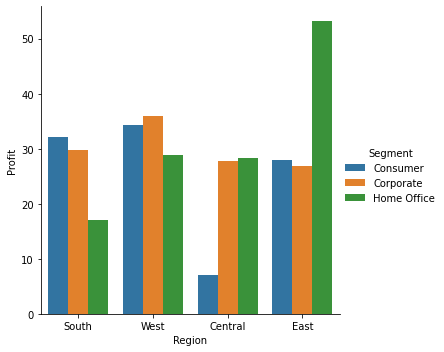

In [3]:
#analyse which segment gives us the highest profit based on region
sns.catplot(x="Region", y="Profit", hue="Segment", kind="bar", data=superstore, ci=None)

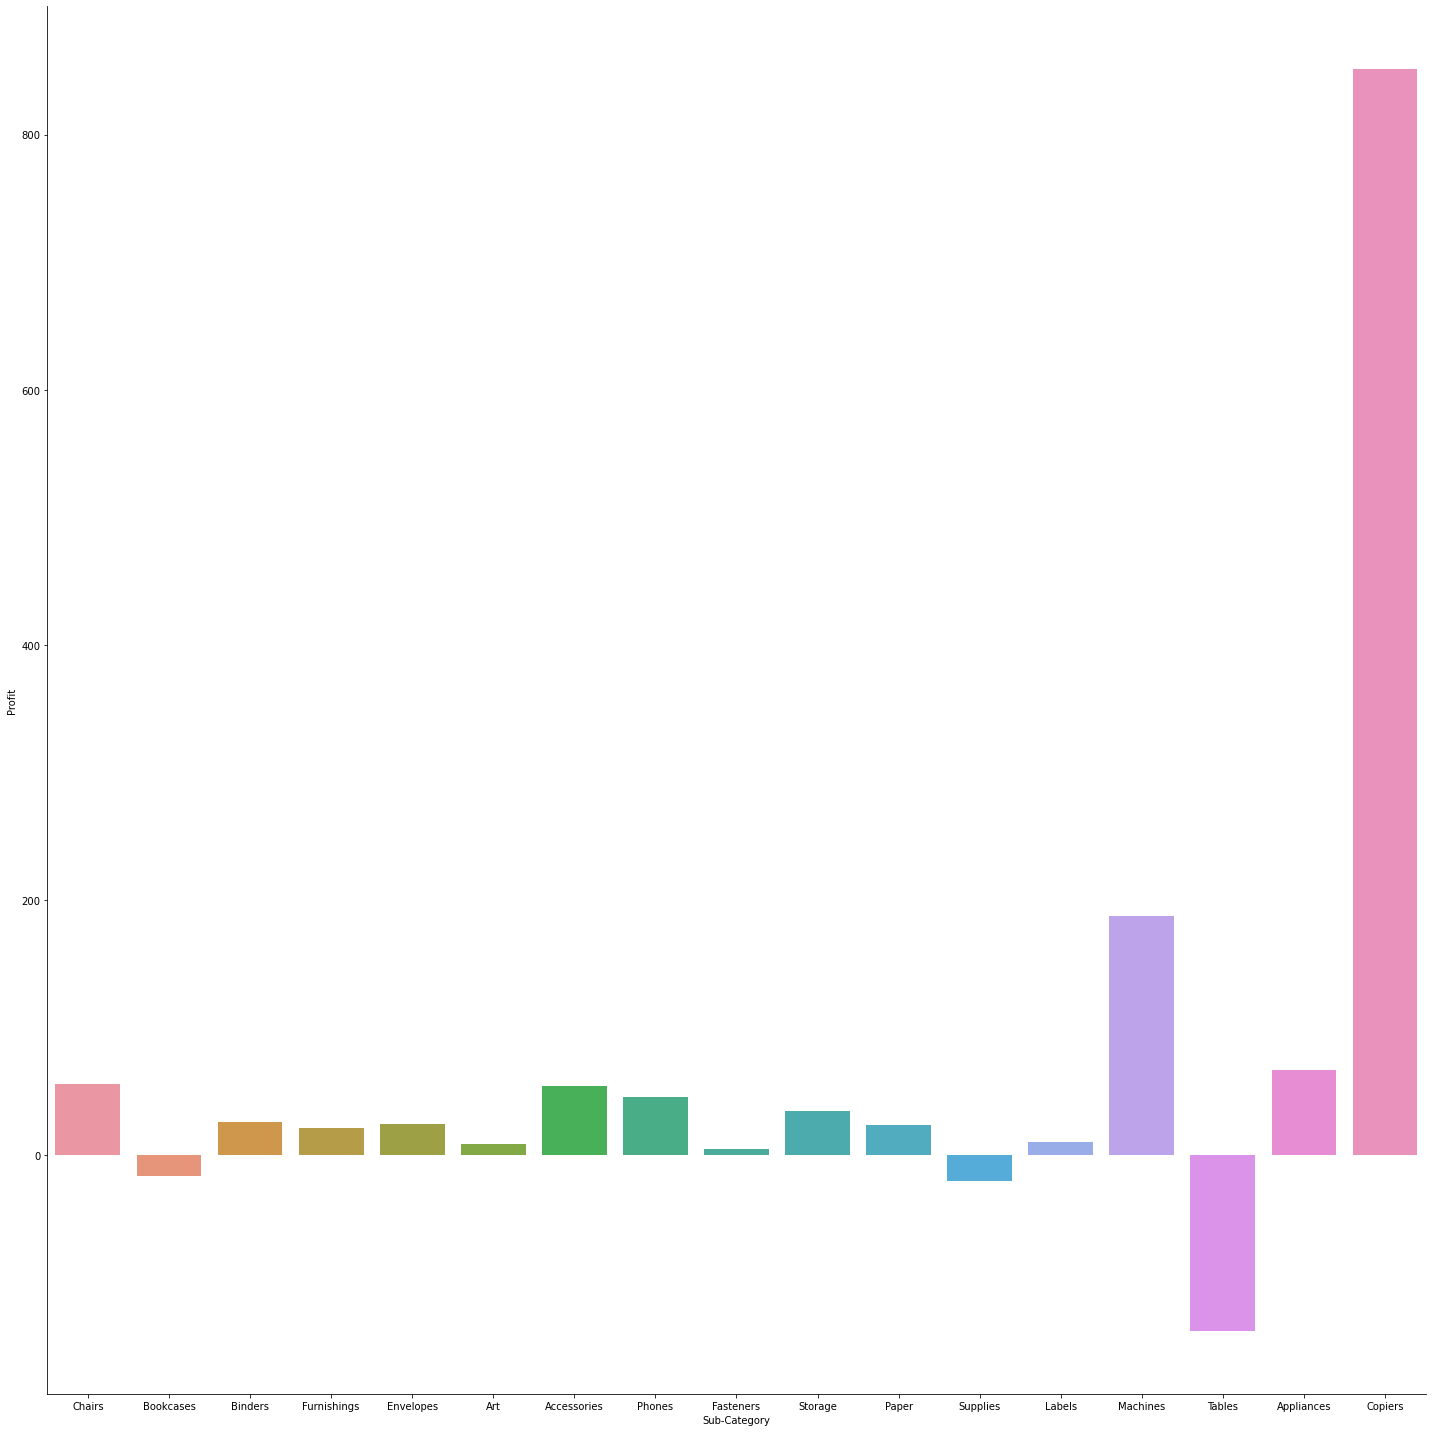

In [4]:
#then, analyse which sub-category gives us the most profit within east region
east_region = superstore.loc[superstore["Region"] == "East"]

sns.catplot(data=east_region, x="Sub-Category", y="Profit", kind="bar", height = 20, ci=None)

In [5]:
#does copiers is in home office segment?
superstore.groupby(['Segment','Sub-Category']).size()

Segment      Sub-Category
Consumer     Accessories     408
             Appliances      244
             Art             428
             Binders         780
             Bookcases       131
             Chairs          329
             Copiers          35
             Envelopes       129
             Fasteners       114
             Furnishings     494
             Labels          189
             Machines         57
             Paper           693
             Phones          451
             Storage         450
             Supplies        100
             Tables          159
Corporate    Accessories     227
             Appliances      155
             Art             218
             Binders         473
             Bookcases        64
             Chairs          188
             Copiers          20
             Envelopes        84
             Fasteners        59
             Furnishings     288
             Labels          102
             Machines         35
             Pape

In [6]:
#locating copier data only
copier = superstore.loc[superstore["Sub-Category"] == "Copiers"]
copier

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
335,336,CA-2015-137946,9/1/2015,9/4/2015,Second Class,DB-13615,Doug Bickford,Consumer,United States,Los Angeles,...,90045,West,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944
392,393,US-2014-135972,9/21/2014,9/23/2014,Second Class,JG-15115,Jack Garza,Consumer,United States,Des Moines,...,98198,West,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883
406,407,CA-2017-117457,12/8/2017,12/12/2017,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Francisco,...,94110,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913
515,516,CA-2017-127432,1/22/2017,1/27/2017,Standard Class,AD-10180,Alan Dominguez,Home Office,United States,Great Falls,...,59405,West,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770
595,596,CA-2014-131450,8/8/2014,8/15/2014,Standard Class,LR-16915,Lena Radford,Consumer,United States,San Diego,...,92024,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820,8821,CA-2017-100622,11/3/2017,11/7/2017,Standard Class,DK-13090,Dave Kipp,Consumer,United States,Orlando,...,32839,South,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,959.984,2,0.2,311.9948
8990,8991,US-2015-128587,12/24/2015,12/30/2015,Standard Class,HM-14860,Harry Marie,Corporate,United States,Springfield,...,65807,Central,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,4899.930,7,0.0,2302.9671
9617,9618,CA-2017-160633,11/16/2017,11/21/2017,Standard Class,BS-11380,Bill Stewart,Corporate,United States,Bowling Green,...,43402,East,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,899.982,3,0.4,74.9985
9839,9840,US-2016-125402,9/25/2016,10/1/2016,Standard Class,DL-12865,Dan Lawera,Consumer,United States,Long Beach,...,90805,West,TEC-CO-10001943,Technology,Copiers,Canon PC-428 Personal Copier,479.976,3,0.2,161.9919


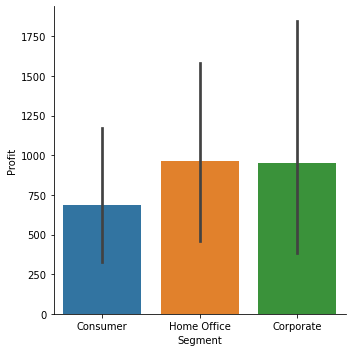

In [7]:
#investigeting which segment copier score on profit
sns.catplot(y="Profit", x="Segment", kind="bar", data=copier)

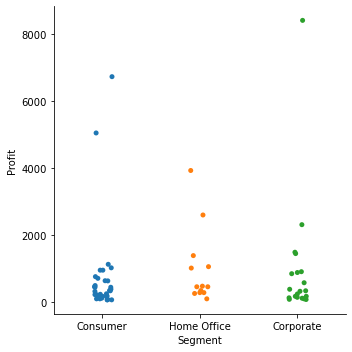

In [8]:
sns.catplot(y="Profit", x="Segment", jitter=1, data=copier)

In [9]:
#to compare categorical vs numerical variable
#problem statement: stakeholder want to know the AVERAGE sales across different REGION


In [10]:
#create table with related data
sales_region = superstore[['Region','Sales']]
sales_region

,Region,Sales
0,South,261.9600
1,South,731.9400
2,West,14.6200
3,South,957.5775
4,South,22.3680
...,...,...
9989,South,25.2480
9990,West,91.9600
9991,West,258.5760
9992,West,29.6000


In [11]:
#grouping by region
mean_sales_region = sales_region.groupby('Region').mean().sort_values('Sales', ascending=False)
mean_sales_region

,Sales
Region,
South,241.803645
East,238.336110
West,226.493233
Central,215.772661


Text(0.5, 0.98, 'Average Sales Across Different Regions')

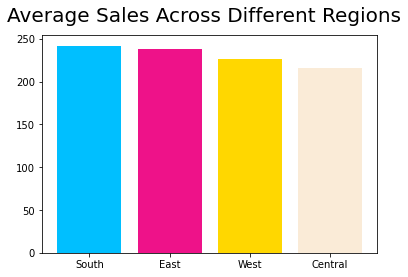

In [12]:
plt.subplot(1,1,1)
plt.bar(x=mean_sales_region.index , height='Sales', data=mean_sales_region, color=['#00BFFF','#EE1289','#FFD700','#FAEBD7'])
plt.suptitle("Average Sales Across Different Regions", size=20)


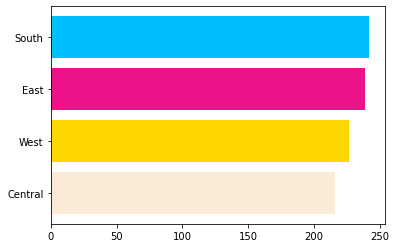

In [13]:
#plotting horizontal bar chart
plt.barh(y=mean_sales_region.index , width='Sales', data=mean_sales_region, color=['#00BFFF','#EE1289','#FFD700','#FAEBD7'])
plt.gca().invert_yaxis()


In [14]:
#to check trend over period of time
#problem statement: Stakeholders would like to understand the trend for Average Profit and Sales across all these years


In [15]:
trend = superstore[['Order Date','Sales','Profit']].sort_values('Order Date')
trend

,Order Date,Sales,Profit
8074,1/1/2017,13.748,-22.6842
848,1/1/2017,48.896,8.5568
8075,1/1/2017,15.224,-38.8212
8073,1/1/2017,6.470,-9.7050
8071,1/1/2017,310.744,-26.6352
...,...,...,...
7875,9/9/2017,31.104,11.2752
5441,9/9/2017,6.368,2.3880
6255,9/9/2017,9.856,3.4496
8753,9/9/2017,17.712,5.9778


In [16]:
superstore['Order Date']= pd.to_datetime(superstore['Order Date'])

In [17]:
trend = trend.groupby('Order Date').mean()
trend

,Sales,Profit
Order Date,,
1/1/2017,148.182800,-18.141090
1/10/2014,27.415000,11.326850
1/10/2015,1018.104000,-373.304800
1/10/2016,58.250000,18.455100
1/11/2014,9.940000,3.081400
...,...,...
9/8/2016,213.999219,-17.887143
9/8/2017,156.023357,-36.497650
9/9/2014,311.045231,1.258585


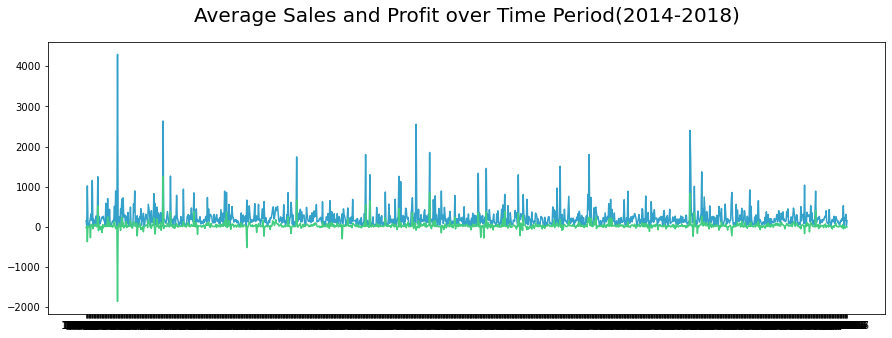

In [18]:
# Visualizing the Line Chart
plt.figure(figsize=[15,5])
plt.plot(trend.index, 'Sales', data=trend, color='#33A1C9') # Avg Sales over Time
plt.plot(trend.index, 'Profit', data=trend, color='#43CD80') # Avg Profit over Time
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)

plt.show()

In [19]:
#Problem Statement: Stakeholders would like to understand the distribution of Profit and Sales.
#Additionally, they would also want to know if there are any potential outliers that can impact their decision making.
df = superstore[['Sales','Profit']]
df

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164
...,...,...
9989,25.2480,4.1028
9990,91.9600,15.6332
9991,258.5760,19.3932
9992,29.6000,13.3200


In [20]:
df.skew()

Sales     12.972752
Profit     7.561432
dtype: float64

In [21]:
df.kurtosis()

Sales     305.311753
Profit    397.188515
dtype: float64

In [22]:
df_melted = pd.melt(df)
df_melted

,variable,value
0,Sales,261.9600
1,Sales,731.9400
2,Sales,14.6200
3,Sales,957.5775
4,Sales,22.3680
...,...,...
19983,Profit,4.1028
19984,Profit,15.6332
19985,Profit,19.3932
19986,Profit,13.3200


In [23]:
df_melted.columns = ["variable", "value"]
df_melted

,variable,value
0,Sales,261.9600
1,Sales,731.9400
2,Sales,14.6200
3,Sales,957.5775
4,Sales,22.3680
...,...,...
19983,Profit,4.1028
19984,Profit,15.6332
19985,Profit,19.3932
19986,Profit,13.3200


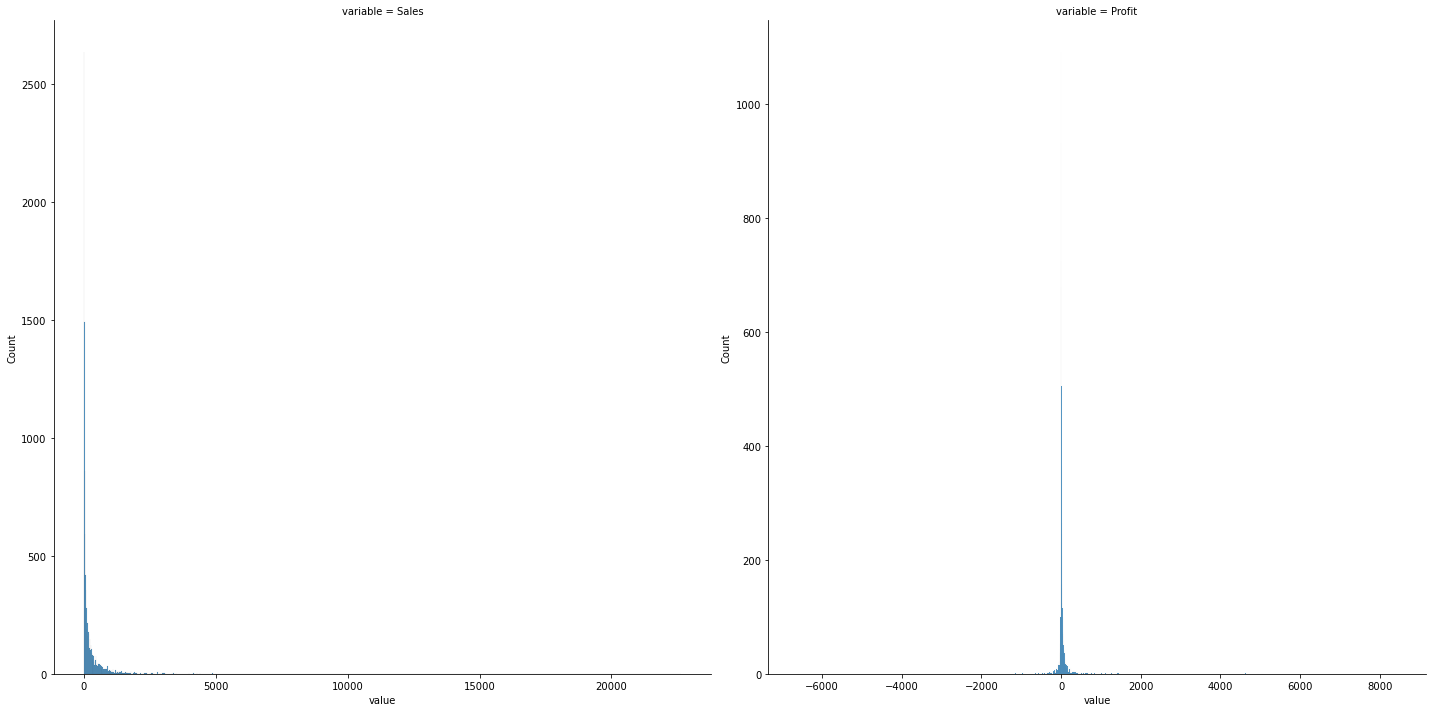

In [24]:
g = sns.FacetGrid(df_melted, col = "variable", sharex = False, sharey = False, height=10)
g.map(sns.histplot, "value")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


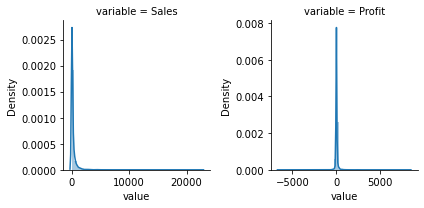

In [25]:
g = sns.FacetGrid(df_melted, col = "variable", sharex = False, sharey = False)
g.map(sns.distplot, "value")

In [26]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [27]:
sales = superstore['Sales']
sales

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [28]:
#Range #Quartiles, IQR, number of outliers, variance & standard deviation
print(f'''
The range is {max(sales) - min(sales)}
The IQR is {iqr(sales)}
The variance is {sales.var()}
The standard deviation is {sales.std()}
The lower fence is {np.quantile(sales,.25)-1.5*iqr(sales)}
The upper fence is {np.quantile(sales,.75)+1.5*iqr(sales)}''')


The range is 22638.036
The IQR is 192.66
The variance is 388434.45530807687
The standard deviation is 623.2451005086818
The lower fence is -271.71000000000004
The upper fence is 498.93


In [29]:
profit = superstore['Profit']
profit

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

In [30]:
#Range #Quartiles, IQR, number of outliers, variance & standard deviation
print(f'''
The range is {max(profit) - min(profit)}
The IQR is {iqr(profit)}
The variance is {profit.var()}
The standard deviation is {profit.std()}
The lower fence is {np.quantile(profit,.25)-1.5*iqr(profit)}
The upper fence is {np.quantile(profit,.75)+1.5*iqr(profit)}''')


The range is 14999.954000000002
The IQR is 27.63525
The variance is 54877.79805537903
The standard deviation is 234.26010769095757
The lower fence is -39.724125
The upper fence is 70.816875


In [31]:
#values outside of lower & upper fence consider as outliers so we cannot take em

In [32]:
df_no_outliers = df[(df.Sales >= -270) & (df.Sales <= 500) & (df.Profit >= -40) & (df.Profit <= 70)] 



In [33]:
df_no_outliers

,Sales,Profit
0,261.960,41.9136
2,14.620,6.8714
4,22.368,2.5164
5,48.860,14.1694
6,7.280,1.9656
...,...,...
9988,206.100,55.6470
9989,25.248,4.1028
9990,91.960,15.6332
9991,258.576,19.3932


In [34]:
df_no_outliers.kurtosis()

Sales     4.996215
Profit    1.414878
dtype: float64

In [35]:
df_no_outliers.skew()

Sales     2.197945
Profit    0.751498
dtype: float64

In [36]:
df_no_outliers_melted = pd.melt(df_no_outliers)
df_no_outliers_melted

,variable,value
0,Sales,261.9600
1,Sales,14.6200
2,Sales,22.3680
3,Sales,48.8600
4,Sales,7.2800
...,...,...
15723,Profit,55.6470
15724,Profit,4.1028
15725,Profit,15.6332
15726,Profit,19.3932


In [37]:
df_no_outliers_melted.columns = ["variable", "value"]
df_no_outliers_melted.columns

Index(['variable', 'value'], dtype='object')

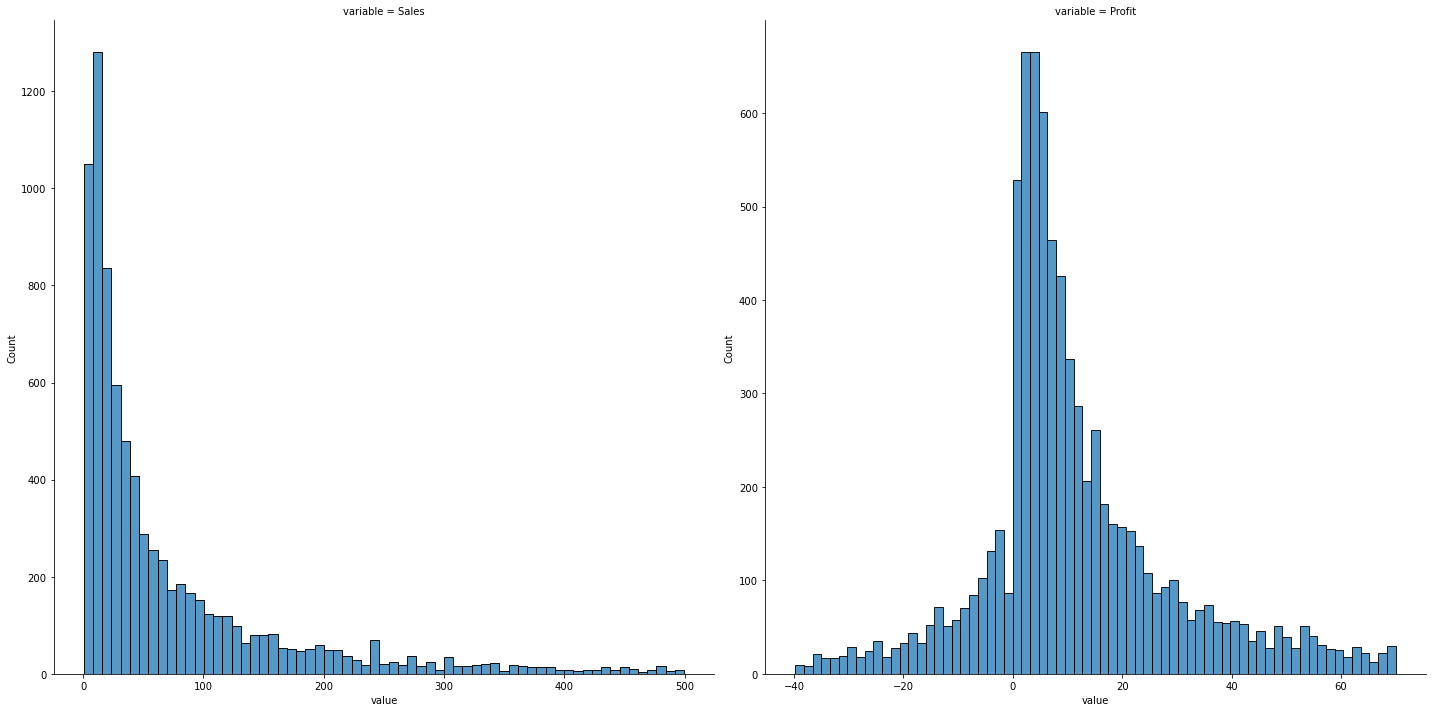

In [38]:
g = sns.FacetGrid(df_no_outliers_melted, col = "variable", sharex = False, sharey = False, height=10)
g.map(sns.histplot, "value")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


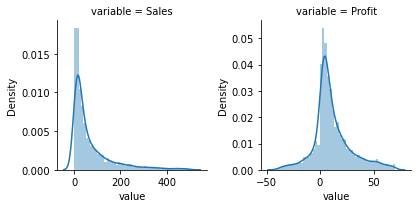

In [39]:
g = sns.FacetGrid(df_no_outliers_melted, col = "variable", sharex = False, sharey = False)
g.map(sns.distplot, "value")

In [40]:
#profit data approximately symmetric & sales is positively skew
#that means most of the sales are below average and profit is normaly distribute


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


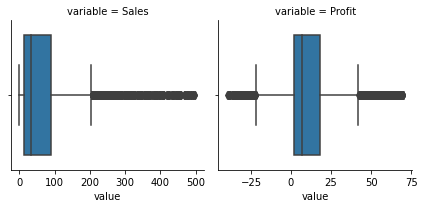

In [41]:
g = sns.FacetGrid(df_no_outliers_melted, col = "variable", sharex = False, sharey = False)
g.map(sns.boxplot, "value")

In [42]:
#problem statement: sales impacts on profit for different customer segment
#relationship between numerical columns
#scatterplot is the best


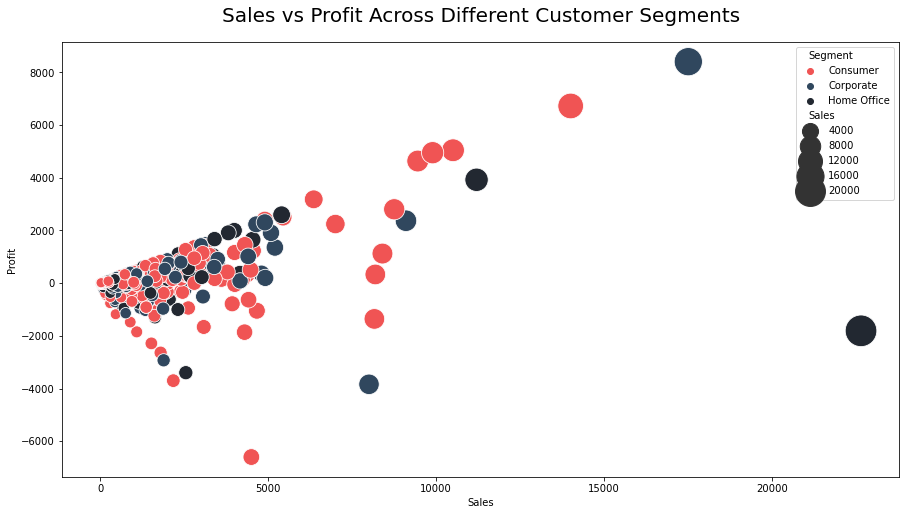

In [43]:
df_scatter = superstore[['Sales','Profit','Segment']]

# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'], palette=['#F05454','#30475E','#222831'], size=df_scatter["Sales"], sizes=(100,1000), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

In [50]:
#problem statement: stakeholder wanted to know effects of ship mode towards sales & profit
#categorical vs numerical
df = superstore[['Ship Mode','Sales','Profit']]
df.head(3)

,Ship Mode,Sales,Profit
0,Second Class,261.96,41.9136
1,Second Class,731.94,219.5820
2,Second Class,14.62,6.8714


In [56]:
df_stacked = df.groupby(['Ship Mode']).sum()
df_stacked

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6354
Standard Class,1.358216e+06,164088.7875


<AxesSubplot:xlabel='Ship Mode'>

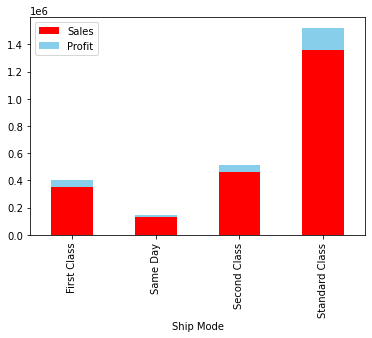

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_stacked.plot(kind='bar', stacked=True, color=['red', 'skyblue'])

In [61]:
df_pie = superstore[['Category','Sales','Profit']]
df.head(3)

,Category,Sales,Profit
0,Furniture,261.96,41.9136
1,Furniture,731.94,219.5820
2,Office Supplies,14.62,6.8714


In [63]:
df_pie = df_pie.groupby('Category').sum()

Text(0.5, 1.0, 'Composition of Category for Sales')

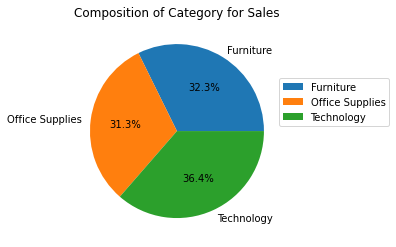

In [106]:
df_pie.plot(y = 'Sales' , kind='pie', autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5,0.5), loc='lower right')
plt.ylabel(None)
plt.title("Composition of Category for Sales")

Text(0.5, 1.0, 'Composition of Category for Profit')

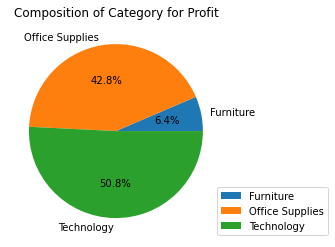

In [124]:
df_pie.plot(y = 'Profit' , kind='pie', autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5,0), loc='lower right')
plt.ylabel(None)
plt.title("Composition of Category for Profit")

In [125]:
df_treemap = superstore[['Segment','Sales']]
df_treemap.head(3)

,Segment,Sales
0,Consumer,261.96
1,Consumer,731.94
2,Corporate,14.62


In [143]:
df_treemap = df_treemap.groupby('Segment').sum()
df_treemap

,Sales
Segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


In [129]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [130]:
import squarify

<AxesSubplot:>

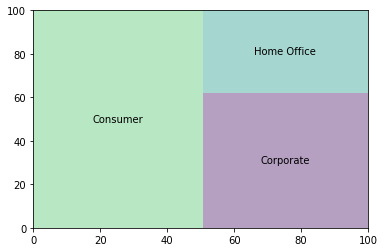

In [154]:
squarify.plot(sizes=df_treemap['Sales'], label = df_treemap.index , alpha=0.4)